# Data Cleaning and Exploration

In [1]:
#Phase 1
import pandas as pd
#read data sets
data_set1=pd.read_csv('/content/customer_data.csv')
data_set2=pd.read_csv('/content/payment_data.csv')
# change type of id Series elements in order to perform fancy indexing
data_set1['id']=data_set1['id'].astype(str)
data_set2['id']=data_set2['id'].astype(str)
ids=list(data_set1['id'])
# have id Series be the index
data_set1=data_set1.set_index('id')
data_set2=data_set2.set_index('id')
#perform fancy indexing
df=data_set2.loc[ids]
df=df[~df.index.duplicated(keep='first')]
#change index type and sort
df.index=df.index.astype('int64')
df= df.sort_index()
data_set1.index=data_set1.index.astype('int64')
data_set1= data_set1.sort_index()
#join the two data frames
df=data_set1.join(df)
# Operation - aggregate number of times overdue for each type into one column to reduce the dimensionality of the data
df['OVD']=df['OVD_t1']+df['OVD_t2']+df['OVD_t3']
data=df.loc[:,'OVD_sum':'OVD'].copy()
# Operation - One-hot encode OVD to indicate the presence of any overdue payments in order to make this column more pertinent to problem
for i in range(len(df['OVD'])):
    if df.iloc[i,-1]!=0:
        df.iloc[i,-1]=1
# remove columns prod_limit,update_date, and report_date, since the majority of values are NaN
# remove OVD_t1, OVD_t2, OVD_t3, and OVD_sum since they contain mostly 0
df.drop('report_date', inplace=True, axis=1)
df.drop('update_date', inplace=True, axis=1)
df.drop('prod_limit', inplace=True, axis=1)
df.drop('OVD_sum',inplace=True,axis=1)
df.drop('OVD_t1', inplace=True, axis=1)
df.drop('OVD_t2', inplace=True, axis=1)
df.drop('OVD_t3', inplace=True, axis=1)
# Operation - fill NaN values to allow machine learning algorithm to make better predictions
#I chose mean value because there was low variance in fea_2 feature
df['fea_2']=df['fea_2'].fillna(df['fea_2'].mean())
#I chose median value because there was high variance in highest_balance feature
df['highest_balance']=df['highest_balance'].fillna(df['highest_balance'].median())

In [2]:
X_nb = df[['new_balance']]
y_hb = df['highest_balance']

In [3]:
customer_df = pd.read_csv('/content/customer_data.csv')
payment_df = pd.read_csv('/content/payment_data.csv')

In [4]:
customer_df.columns

Index(['label', 'id', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6',
       'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11'],
      dtype='object')

In [5]:
payment_df.columns

Index(['id', 'OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal',
       'prod_code', 'prod_limit', 'update_date', 'new_balance',
       'highest_balance', 'report_date'],
      dtype='object')

In [6]:
customer_df.sort_values('id').head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
56,0,54982353,1,1130.0,2,1000000.0,2,4,-1,100,5,650018,1.000000
1091,0,54982356,1,1391.0,1,1200000.0,2,5,-1,64,5,361026,1.000000
244,1,54982387,2,1349.0,1,286000.0,2,3,-1,80,3,361003,1.000000
69,0,54982463,5,1272.5,3,70000.0,2,15,5,113,5,60033,167.122709
682,0,54982530,5,1272.5,3,120000.0,1,15,5,110,5,72000,187.082869


In [7]:
payment_df.sort_values('id').head() # shared ids with customer_df

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
5451,54982353,0,0,0,0,19,10,NaN,16/07/2011,31677.6,204037.0,14/12/2015
8143,54982353,0,0,0,0,11,2,NaN,21/02/2001,0.0,248874.0,22/06/2007
7670,54982353,0,0,0,0,1,10,NaN,08/01/2006,0.0,1622.0,NaN
7365,54982353,0,0,0,0,1,10,NaN,21/11/2006,0.0,NaN,NaN
7749,54982353,0,0,0,0,0,10,NaN,30/09/2005,0.0,NaN,NaN


In [8]:
customer_df['id'].value_counts() # no duplicate instances

id
54982665    1
58991343    1
54988970    1
54991614    1
58989779    1
           ..
54982697    1
54987300    1
58993803    1
58985008    1
54989781    1
Name: count, Length: 1125, dtype: int64

In [9]:
payment_df['id'].value_counts() # duplicate instances

id
58988212    55
54990497    48
58998646    45
58991343    39
58987276    39
            ..
59003280     1
58997216     1
54988258     1
58995803     1
54986089     1
Name: count, Length: 1125, dtype: int64

In [10]:
payment_df.loc[:,'OVD_sum'].value_counts() # mostly 0

OVD_sum
0       7330
1         76
30        52
15        19
6         15
        ... 
96         1
97         1
3394       1
2269       1
690        1
Name: count, Length: 393, dtype: int64

In [11]:
payment_df['OVD_t1'].value_counts(),payment_df['OVD_t2'].value_counts(),payment_df['OVD_t3'].value_counts() # mostly 0

(OVD_t1
 0     7475
 1      397
 2      147
 3       61
 4       61
 5       26
 6       20
 7       15
 8       14
 9        9
 11       5
 12       4
 14       3
 15       2
 16       2
 10       2
 31       2
 13       2
 17       1
 34       1
 23       1
 Name: count, dtype: int64,
 OVD_t2
 0     7886
 2      127
 1      111
 3       43
 4       31
 5       12
 6        9
 7        9
 9        7
 10       4
 11       4
 8        3
 12       1
 23       1
 14       1
 34       1
 Name: count, dtype: int64,
 OVD_t3
 0     7983
 1       46
 2       35
 3       22
 35      15
 6       14
 5       13
 34      12
 4       12
 9       12
 20       7
 33       6
 7        5
 24       5
 13       5
 18       5
 17       5
 11       4
 32       4
 14       4
 8        4
 15       4
 12       4
 22       3
 10       3
 31       3
 19       3
 23       3
 30       2
 21       2
 16       2
 25       2
 26       1
 Name: count, dtype: int64)

In [12]:
(payment_df.loc[:,'OVD_sum'] == payment_df['OVD_t1'] +payment_df['OVD_t2']+payment_df['OVD_t3']).sum()
# 7432 / 8250 have correct sums

7432

# Exploratory Data Analysis

Text(0, 0.5, 'Number of clients')

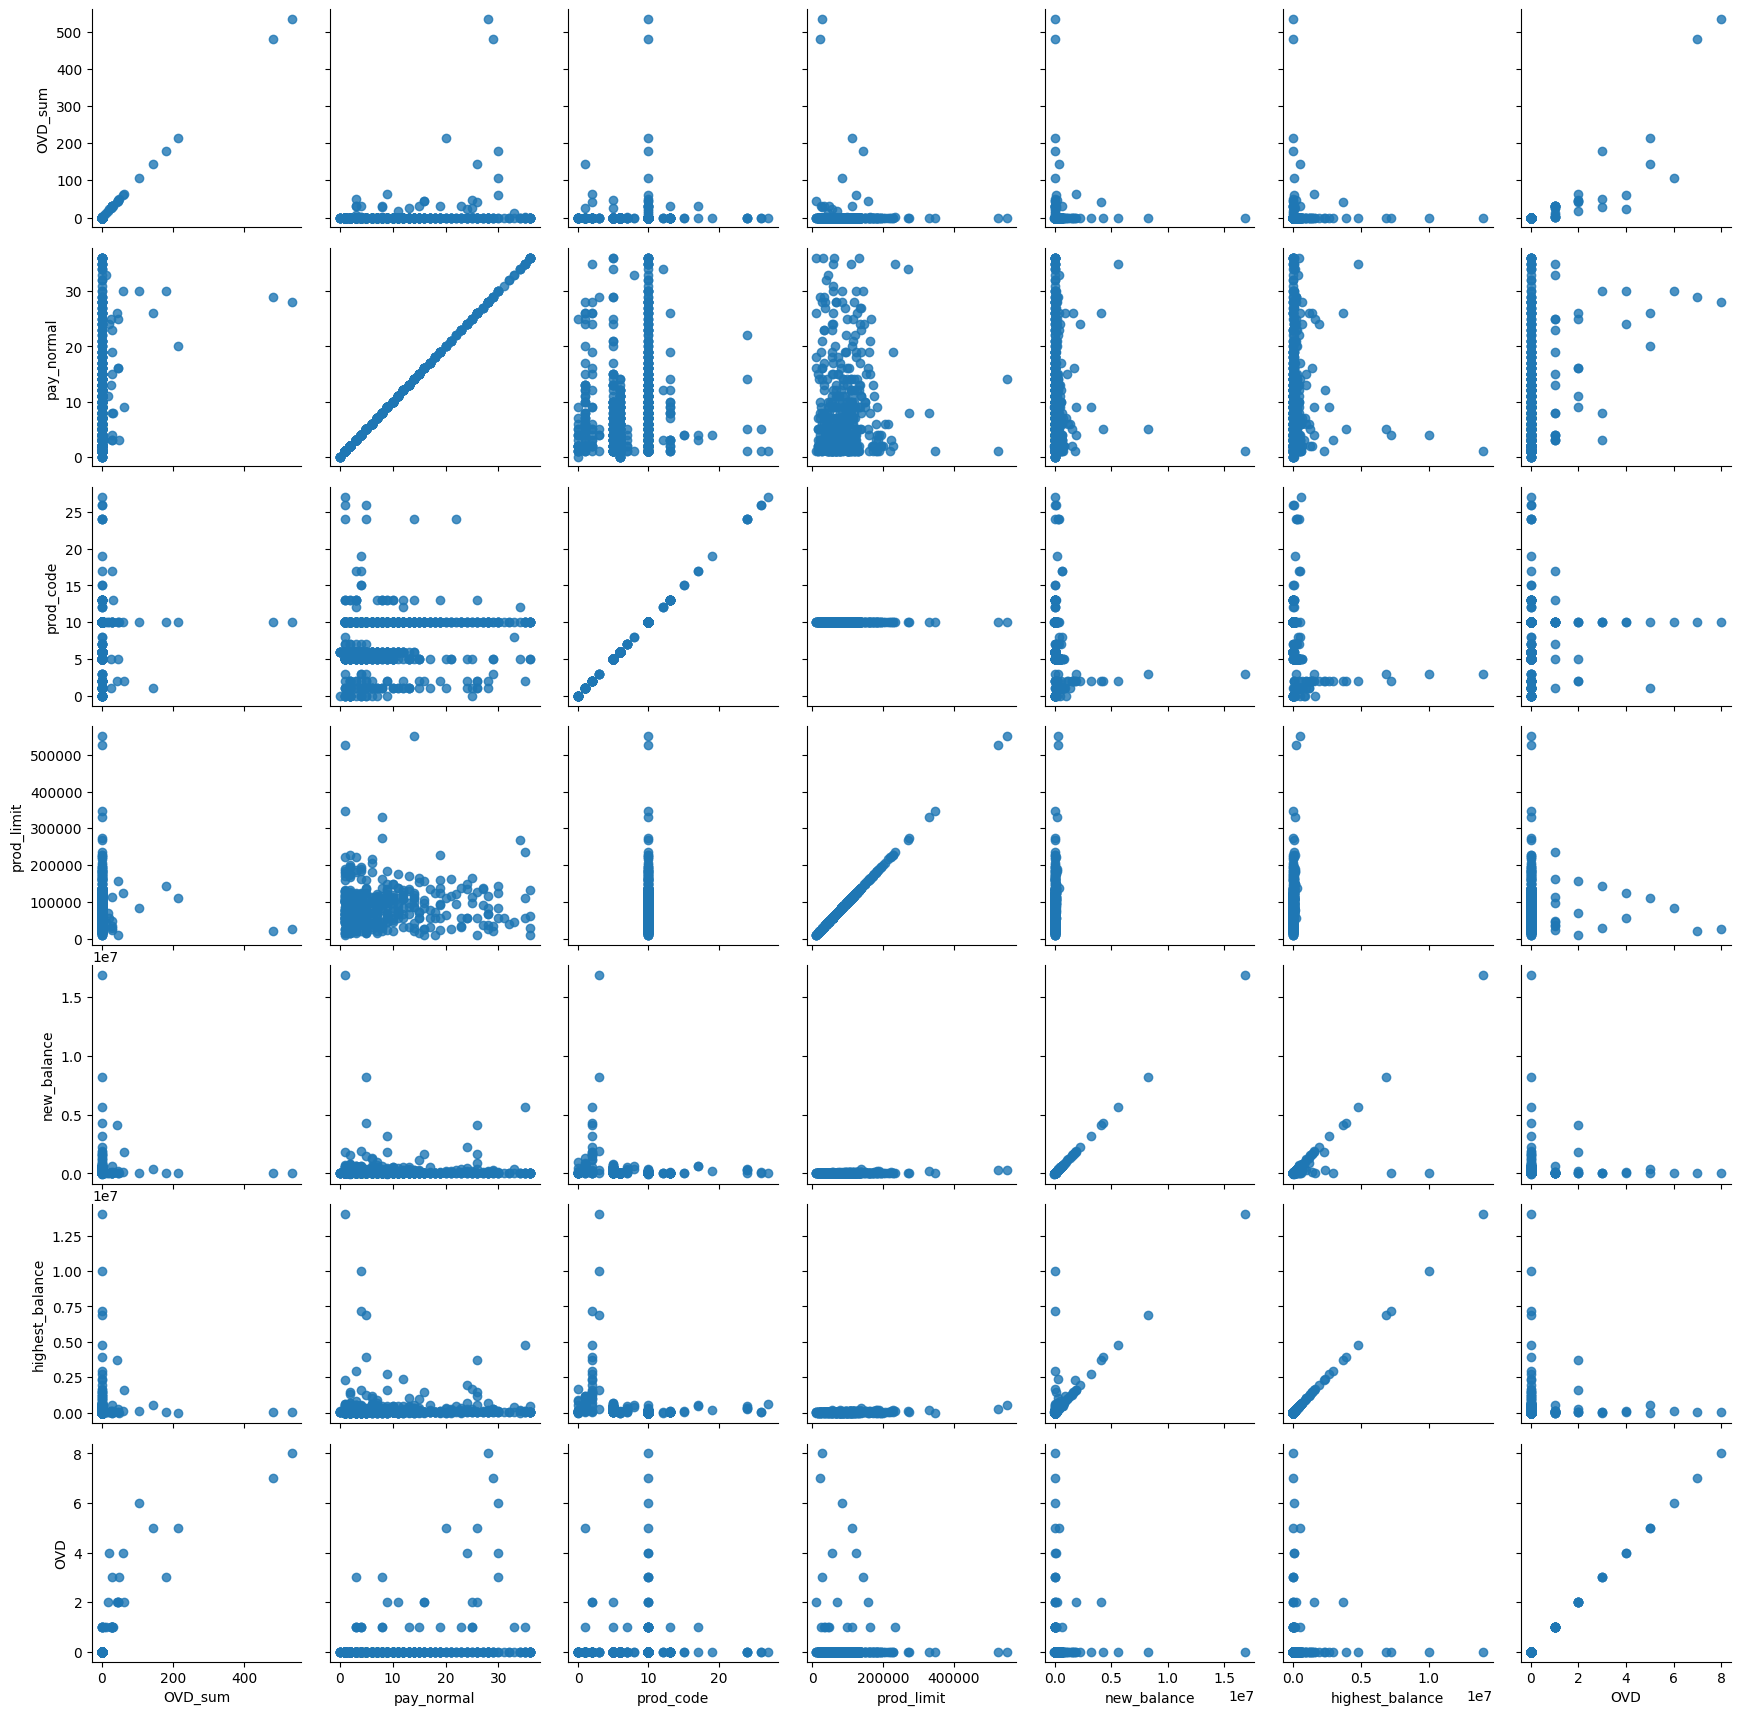

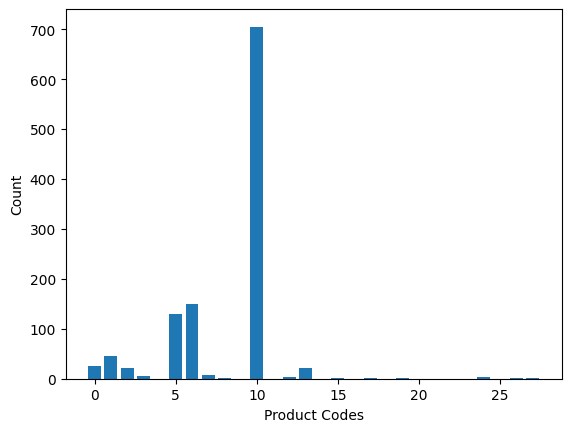

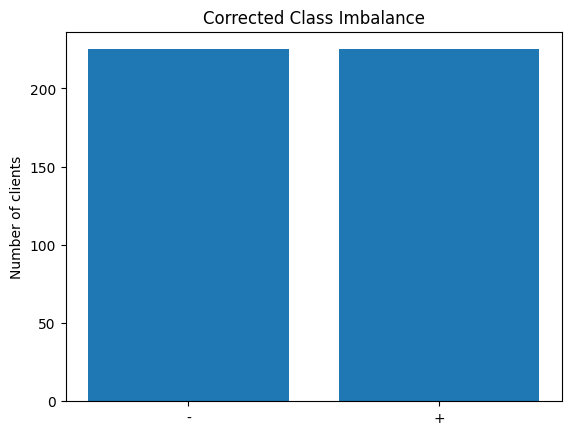

In [13]:
#Phase 2
# import cleaned dataset and display
import pandas as pd
# display the first five rows data.head(5)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#find which values in highest_balance are greater than 550000 and have bad risk
mask=(df['highest_balance']>550000) & (df['label']==1)
#find sum
highrisk=mask.sum()
#find which values in highest_balance are greater than 550000 and have good risk
mask=(df['highest_balance']>550000) & (df['label']==0)
#take sum
lowrisk=mask.sum()
#initialize list
colors = []
#replace 0 and 1 with the magenta or green for scatter plot
for e in df['label']:
    if e ==1:
        colors.append('m')
    else:
        colors.append('g')

# make two-dimensional plot of each feature
h=sns.PairGrid(data,palette='RdBu_r')
h.map(plt.scatter, alpha=0.8)
#Initialize dictionary
DiversityofProducts={}
#count how many of each product is contained in the data
for element in df['prod_code']:
    if element in DiversityofProducts:
        DiversityofProducts[element]+=1
    else:
        DiversityofProducts[element]=1
#convert to series
s=pd.Series(DiversityofProducts)
plt.figure()
# plot
plt.bar(x=s.index.to_numpy(), height=s.values)
#label x axis
plt.xlabel('Product Codes')
#label y axis
plt.ylabel('Count')
# remove imbalance in class labels
j=0
while df.shape[0]>450:
    if df['label'].iloc[j]==0:
        df.drop(df.index[j], inplace=True, axis=0)
    else:
        j+=1
# import relevant items
import numpy as np
import matplotlib.pyplot as plt
#assign label values to a variable
lab_values=df['label'].values
#Sum the number of good risk class labels
count0=np.equal(lab_values,0).sum()
#Sum the number of bad risk credit labels
count1=np.equal(lab_values,1).sum()
plt.figure()
#create plot
plt.bar([1,2],height=[count0,count1])
#create ticks on x axis
plt.xticks([1,2],['-','+'])
#create title
plt.title('Corrected Class Imbalance')
#create y label
plt.ylabel('Number of clients')

# Model Selection

86.7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


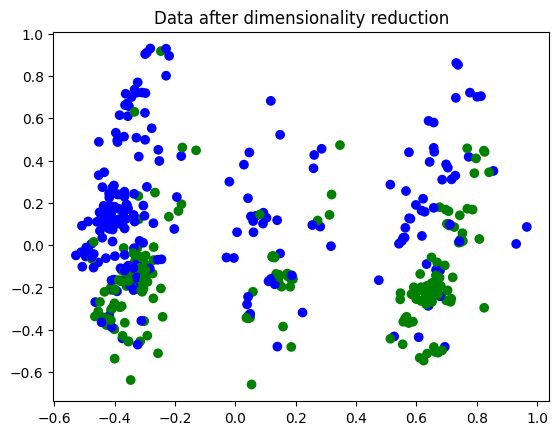

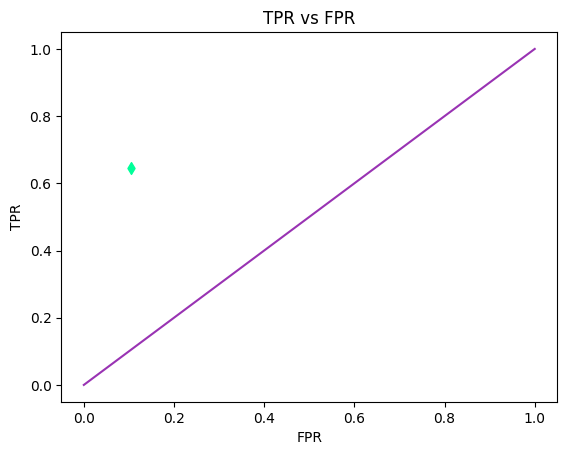

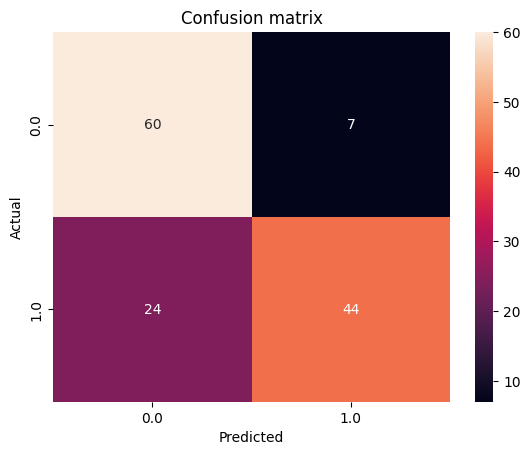

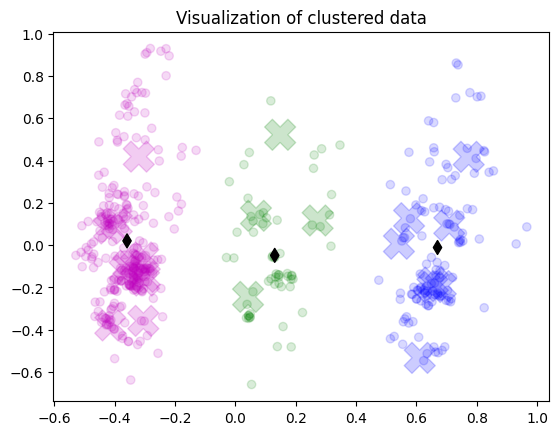

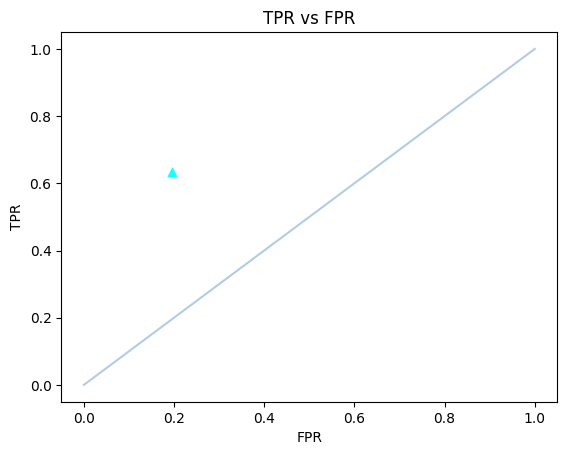

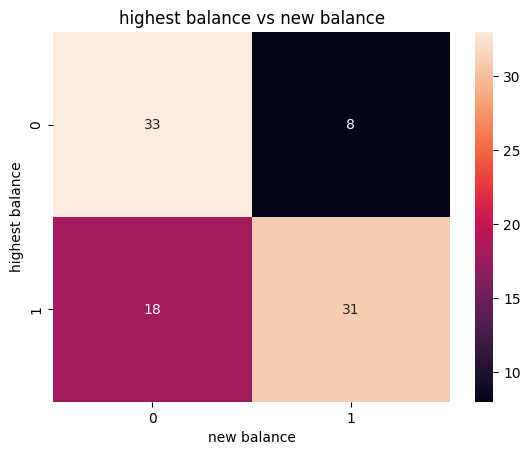

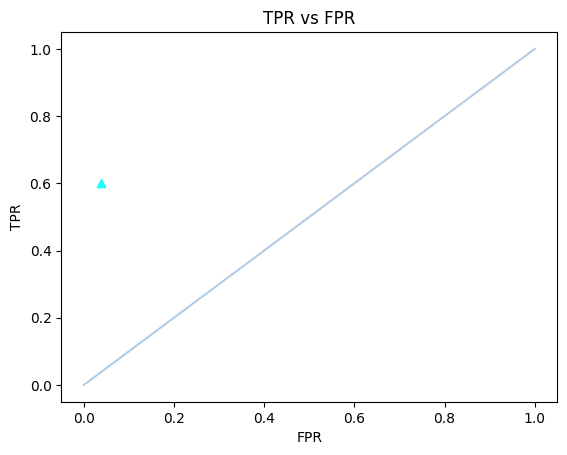

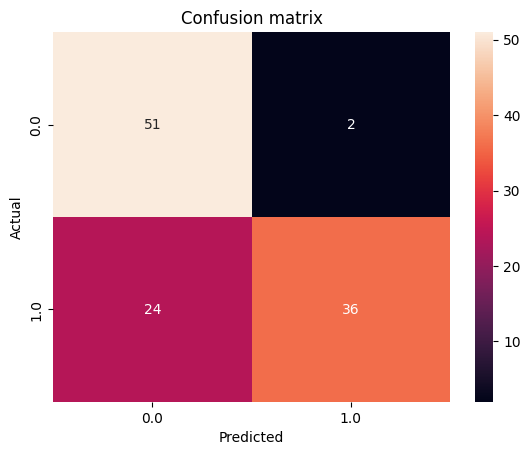

In [14]:
#Phase 3
# import your cleaned dataset
#import relevant items
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import sklearn.model_selection
from sklearn.preprocessing import MinMaxScaler
# copy data frame
Z=df.copy().sample(frac=1,random_state=0)
#normalization
norm = MinMaxScaler().fit(Z)
#transform the data
Z = norm.transform(Z)
#convert to data frame
Z=pd.DataFrame(Z,index=df.index,columns=df.columns)
#assign subset of data to X
X=Z.loc[:,'fea_1':'fea_11']
#assign labels to y
y=Z['label']
#import PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
#fit PCA
pca.fit(X)
#perform dimensionality reduction
X=pca.transform(X)
#split the data
Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X, y, train_size=0.7,random_state=0)
#Instantiate knn classifier
knn=KNeighborsClassifier(n_neighbors=7)
#determine best accuracy
Accuracy=np.round(100*np.max(cross_val_score(knn, X, y, cv=10)),1)
print(Accuracy)
#fit knn model
knn=knn.fit(Xtrain,ytrain)
# predict y values
ypred=knn.predict(Xtest)
#initialize number of true positives
TP=0
#initialize number of false positives
FP=0
#initialize number of true negatives
TN=0
#initialize number of false negatives
FN=0
# count number true positves, true negatives, false positives, and false negatives
for i in range(len(ypred)):
    if ypred[i]==1 and ytest.iloc[i]==1:
        TP+=1
    elif ypred[i]==1 and ytest.iloc[i]==0:
        FP+=1
    elif ypred[i]==0 and ytest.iloc[i]==1:
        FN+=1
    elif ypred[i]==0 and ytest.iloc[i]==0:
        TN+=1
#Calculate true positive rate
TPR=TP/(TP+FN)
#Calculate precision
Precision=TP/(TP+FP)
#calculate false positive rate
FPR=FP/(TN+FP)
#calculate true negative rate
TNR=TN/(TN+FP)
#calculate false negative rate
FNR=FN/(TP+FN)
#calculate prevalence
Prevalence=(TP+FN)/len(ytest)
#intialize list
c=[]
#_r_e_p_l_a_c_e_ _1_ _a_n_d_ _0_ _w_i_t_h_ _‘b_’ _a_n_d_ _‘g_’ _
for e in y:
    if e==1:
        c.append('b')
    else:
        c.append('g')
#create figure
plt.figure(1)
#display scatter plot
plt.scatter(X[:,0],X[:,1],c=c)
#display title
plt.title('Data after dimensionality reduction')
#create figure
plt.figure(2)
#create points for comparison with (TNR,FPR)
x=np.linspace(0,1,100)
#make plot
plt.plot(x,x,color=(.6,.2,.7))
#make scatter plot
plt.scatter(FPR,TPR,marker='d',color=(0,1,.6))
#label y axis
plt.ylabel('TPR')
#label x axis
plt.xlabel('FPR')
#title plot
plt.title('TPR vs FPR')
#make plot
plt.figure(3)
#display confusion matrix
confusion_matrix = pd.crosstab(ytest, ypred, rownames=['Actual'],
colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
#titlw confusion matrix
plt.title('Confusion matrix')
# import relevant items
import sklearn.model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
#make copy of data frame
Z=df.copy().sample(frac=1,random_state=0)
#fit MaxMinScaler
norm = MinMaxScaler().fit(Z)
#transform the data
Z = norm.transform(Z)
#create new data frame
Z=pd.DataFrame(Z,index=df.index,columns=df.columns)
#same
X=Z.loc[:,'fea_1':'fea_11']
#same
y=Z['label']
#initialze pca object
pca=PCA(n_components=2)
#fit to data
pca.fit(X)
#perform dimensionality reduction on data
X=pca.transform(X)
#create data split
Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X, y, train_size=0.95,random_state=1)
#initialize cluster centers
init=[[-.4,.2],[.2,.2],[.7,.2]]
#initialize kmeans
kmeans = KMeans(n_clusters=3, init=np.array(init))
#fit it to data
kmeans=kmeans.fit(Xtrain)
#same
colors=[]
for e in kmeans.labels_:
    if e ==0:
        colors.append('m')
    elif e==1:
        colors.append('g')
    elif e==2:
        colors.append('b')
#Predict cluster
ypred=kmeans.predict(Xtest)
#same
ctest=[]
for e in ypred:
    if e ==0:
        ctest.append('m')
    elif e==1:
        ctest.append('g')
    elif e==2:
        ctest.append('b')
plt.figure(8)
#Fit
plt.scatter(Xtrain[:,0], Xtrain[:,1], c=colors, alpha=0.15)
#Test
plt.scatter(Xtest[:,0],Xtest[:,1],c=ctest,marker='X',s=500,alpha=.2)
#Cluster centers
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=[50,50,50],marker='d',c='k')
#same
plt.title('Visualization of clustered data')
#import relevant items
import sklearn
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
#same
Z=df.copy().sample(frac=1,random_state=0)
#same
X=Z.loc[:,'fea_1':'fea_11']
#same
y=Z['label']
#initialize decision tree
dt = DecisionTreeClassifier(random_state=0)
#same
Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X, y, train_size=0.8,random_state=0)
#same
Accuracy=np.round(100*np.max(cross_val_score(dt, X, y, cv=10)),1)
#same
model=dt.fit(Xtrain,ytrain)
#same
ypred=model.predict(Xtest)
#same
TP=0
FP=0
TN=0
FN=0
#same
for i in range(len(ypred)):
    if ypred[i]==1 and ytest.iloc[i]==1:
        TP+=1
    elif ypred[i]==1 and ytest.iloc[i]==0:
        FP+=1
    elif ypred[i]==0 and ytest.iloc[i]==1:
        FN+=1
    elif ypred[i]==0 and ytest.iloc[i]==0:
        TN+=1
#same
TPR=TP/(TP+FN)
Precision=TP/(TP+FP)
FPR=FP/(TN+FP)
TNR=TN/(TN+FP)
FNR=FN/(TP+FN)
Prevalance=(TP+FN)/len(ytest)
#same
x=np.linspace(0,1,100)
#same
plt.figure(4)
plt.plot(x,x,color=(.7,.8,.9))
plt.scatter(FPR,TPR,marker='^',color=(.1,1,1))
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('TPR vs FPR')
plt.figure(5)
#same
confusion_matrix = pd.crosstab(ytest, ypred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.title('Confusion matrix')
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt # To visualize
import pandas as pd # To read data
import sklearn.metrics
from sklearn.linear_model import LinearRegression
#same
Z=df.copy().sample(frac=1,random_state=0)
linear_regressor = LinearRegression() # create object for the class
Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_nb, y_hb, train_size=0.95,random_state=0)
model=linear_regressor.fit(Xtrain, ytrain) # perform linear regression
# get coefficient
param=model.coef_[0]
#get y-intercept
intercept=model.intercept_
#predict
ypred = model.predict(Xtest.values.reshape(-1, 1)) # make predictions
#determine R2 value
r2=r2_score(ytest,ypred)
#same
plt.scatter(Xtest, ypred,color=(0,1,.9))
#create function that creates a line representing the model on plot
def line(s, i):
    axes = plt.gca()
    x = np.array(axes.get_xlim())
    y = i + s * x
    plt.plot(x, y, '-',color=(.2,1,.7))
#call function
line(param,intercept)
#same
plt.xlabel('new balance')
#same
plt.ylabel('highest balance')
#same
plt.title('highest balance vs new balance')
#import relevant items
import sklearn.linear_model
import seaborn as sn
#create copy of data
Z=df.copy().sample(frac=1,random_state=0)
#normalize
norm = MinMaxScaler().fit(Z)
#transform data
Z = norm.transform(Z)
#make data frame
Z=pd.DataFrame(Z,index=df.index,columns=df.columns)
#assign x to slice of data frame
X=Z.loc[:,'fea_1':'fea_11']
#assign labels to y
y=Z['label']
# create data split
Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X, y, train_size=0.75, random_state=0)
#initialize logistic regresiion classifier
logistic_regression = sklearn.linear_model.LogisticRegression()
#calculate accuracy
Accuracy=np.round(100*np.max(cross_val_score(logistic_regression, X, y, cv=10)),1)
#fit the model
model=logistic_regression.fit(Xtrain, ytrain)
#make predictions
ypred = model.predict(Xtest)
#same as before
TP=0
FP=0
TN=0
FN=0
#same as before
for i in range(len(ypred)):
    if ypred[i]==1 and ytest.iloc[i]==1:
        TP+=1
    elif ypred[i]==1 and ytest.iloc[i]==0:
        FP+=1
    elif ypred[i]==0 and ytest.iloc[i]==1:
        FN+=1
    elif ypred[i]==0 and ytest.iloc[i]==0:
        TN+=1
#same as before
TPR=TP/(TP+FN)
Precision=TP/(TP+FP)
FPR=FP/(TN+FP)
TNR=TN/(TN+FP)
FNR=FN/(TP+FN)
Prevalance=(TP+FN)/len(ytest)
#same as before
x=np.linspace(0,1,100)
#same as before
plt.figure(6)
#same as before
plt.plot(x,x,color=(.7,.8,.9))
#same as before
plt.scatter(FPR,TPR,marker='^',color=(.1,1,1))
#same as before
plt.ylabel('TPR')
plt.xlabel('FPR')
#same as before
plt.title('TPR vs FPR')
plt.figure(7)
confusion_matrix = pd.crosstab(ytest, ypred, rownames=['Actual'], colnames=['Predicted'])
#same as before
sn.heatmap(confusion_matrix, annot=True)
plt.title('Confusion matrix')
plt.show()